**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from scipy.stats import zscore

# import data 2C_weka.csv for 2 Class Classifcation.


In [9]:
class2data = pd.read_csv("2classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [10]:
print(class2data.head(10))
print(class2data.tail(10))

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   
5         40.250200            13.921907              25.124950     26.328293   
6         53.432928            15.864336              37.165934     37.568592   
7         45.366754            10.755611              29.038349     34.611142   
8         43.790190            13.533753              42.690814     30.256437   
9         36.686353             5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal 

In [11]:
#find missing values
print(class2data.isnull().sum())

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [12]:
#rename columns to remove space before starting EDA
class2data.rename(columns={'pelvic_tilt numeric':'pelvic_tilt','class':'class_column'},inplace=True)

In [13]:
print(class2data['class_column'].unique())

['Abnormal' 'Normal']


In [44]:
class2data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_column
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.322581
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


In [15]:
print(class2data.var())

pelvic_incidence             297.097633
pelvic_tilt                  100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
dtype: float64


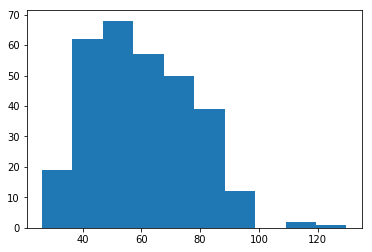

In [17]:
plt.hist(class2data.pelvic_incidence)
plt.show()

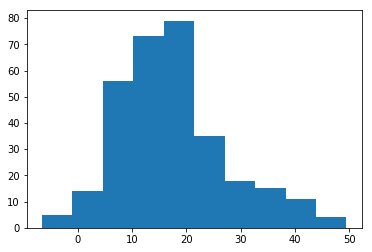

In [18]:
plt.hist(class2data.pelvic_tilt)
plt.show()

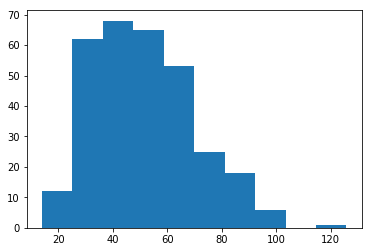

In [19]:
plt.hist(class2data.lumbar_lordosis_angle)
plt.show()

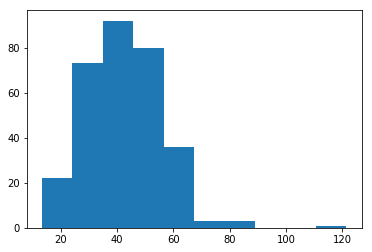

In [20]:
plt.hist(class2data.sacral_slope)
plt.show()

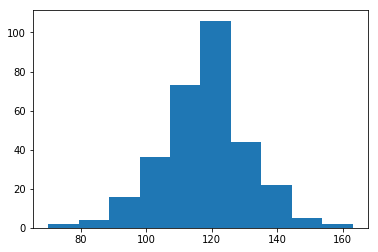

In [21]:
plt.hist(class2data.pelvic_radius)
plt.show()

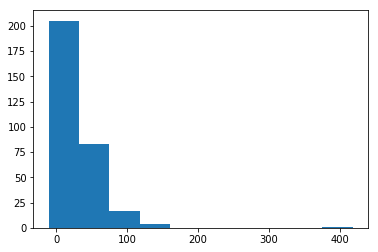

In [22]:
plt.hist(class2data.degree_spondylolisthesis)
plt.show()

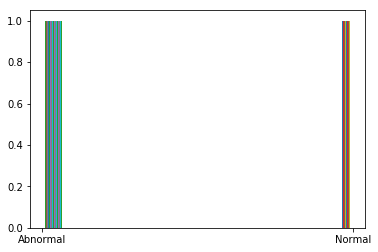

In [23]:
plt.hist(class2data.class_column)
plt.show()

In [24]:
class2data.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class_column                 object
dtype: object

TypeError: can't multiply sequence by non-int of type 'float'

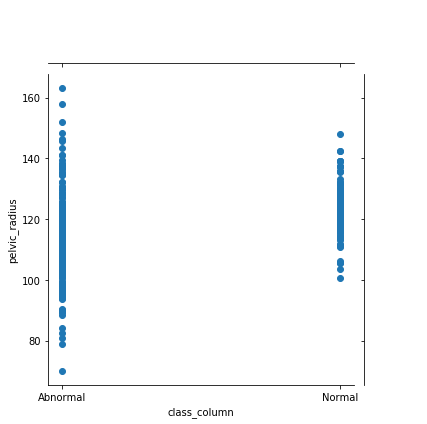

In [25]:
import seaborn as sns
sns.jointplot(x='class_column',y='pelvic_radius',data=class2data)

TypeError: can't multiply sequence by non-int of type 'float'

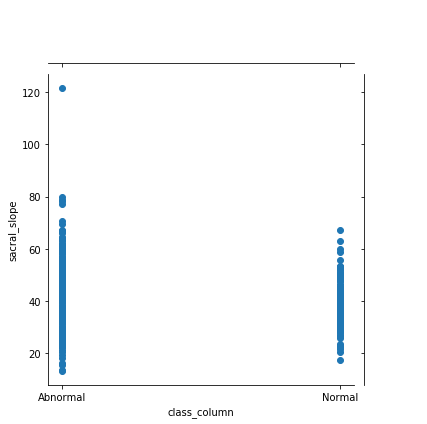

In [28]:
sns.jointplot(x='class_column',y='sacral_slope',data=class2data)

# Encode the Class variable to integer.

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(class2data['class_column'].value_counts())
class2data['class_column']=label_encoder.fit_transform(class2data['class_column'])
print(class2data['class_column'].value_counts())

Abnormal    210
Normal      100
Name: class_column, dtype: int64
0    210
1    100
Name: class_column, dtype: int64


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [30]:
#Features and Labels definition
print(class2data.info())
Y=class2data.class_column
X=class2data.drop('class_column',axis=1)
print(Y.shape)
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class_column                310 non-null int32
dtypes: float64(6), int32(1)
memory usage: 15.8 KB
None
(310,)
(310, 6)


In [31]:
y=np.array(Y)
print(y.shape)

(310,)


# Normalize your Data (X) to get values between 0 to 1.

In [32]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
print(x_scaled)

[[0.35568788 0.51989984 0.22917997 0.2508573  0.30746116 0.02514839]
 [0.12450104 0.2967831  0.09857833 0.14462935 0.47664891 0.03636497]
 [0.41166648 0.51393229 0.32299466 0.30766054 0.38609692 0.0175229 ]
 ...
 [0.34043781 0.52244298 0.28789745 0.23490726 0.59779618 0.01943732]
 [0.18425678 0.27235174 0.24684569 0.21462279 0.52117504 0.02624045]
 [0.07420202 0.20770855 0.20261992 0.14251659 0.57924032 0.02527676]]


# Split the dat as train and test with a ratio of 70:30.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,train_size=0.70, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)

(217, 6)
(93, 6)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [34]:
#trying out KNN for K=5 to start with,
knn=KNeighborsClassifier(n_neighbors=5,p=1,weights='uniform')
knn.fit(X_train, y_train)
y_test_pred=knn.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [35]:
print("knn score for testing : ", knn.score(X_test,y_test))

knn score for testing :  0.7634408602150538


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [36]:
error_rate = [] 
for k in range(1,30,2): 
    print("For K = ",k,":")
    knn=KNeighborsClassifier(n_neighbors=k,p=1,weights='uniform')
    knn.fit(X_train, y_train)
    y_test_pred=knn.predict(X_test)
    print("knn score for testing : ", knn.score(X_test,y_test))
    error_rate.append(np.mean(y_test_pred !=y_test))

For K =  1 :
knn score for testing :  0.7526881720430108
For K =  3 :
knn score for testing :  0.7634408602150538
For K =  5 :
knn score for testing :  0.7634408602150538
For K =  7 :
knn score for testing :  0.7634408602150538
For K =  9 :
knn score for testing :  0.7634408602150538
For K =  11 :
knn score for testing :  0.7634408602150538
For K =  13 :
knn score for testing :  0.7849462365591398
For K =  15 :
knn score for testing :  0.7849462365591398
For K =  17 :
knn score for testing :  0.7849462365591398
For K =  19 :
knn score for testing :  0.8172043010752689
For K =  21 :
knn score for testing :  0.8064516129032258
For K =  23 :
knn score for testing :  0.7849462365591398
For K =  25 :
knn score for testing :  0.8064516129032258
For K =  27 :
knn score for testing :  0.8064516129032258
For K =  29 :
knn score for testing :  0.7741935483870968


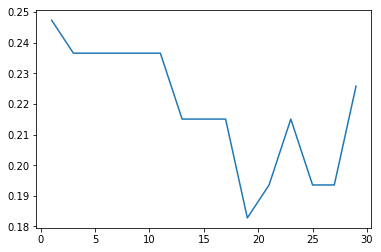

In [37]:
plt.plot(range(1,30,2),error_rate)
plt.show()

k value 19 is optimal here

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [38]:
#import dataset
class3data = pd.read_csv("3classdata.csv")

In [39]:
print(class3data.head(10))
print(class3data.tail(10))

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   
5         40.250200    13.921907              25.124950     26.328293   
6         53.432928    15.864336              37.165934     37.568592   
7         45.366754    10.755611              29.038349     34.611142   
8         43.790190    13.533753              42.690814     30.256437   
9         36.686353     5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.5

In [40]:
#find missing values
print(class3data.isnull().sum())

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [41]:
class3data.rename(columns={'class':'class_column'},inplace=True)

In [42]:
print(class3data['class_column'].unique())

['Hernia' 'Spondylolisthesis' 'Normal']


In [43]:
class3data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [45]:
print(class3data.var())

pelvic_incidence             297.097633
pelvic_tilt                  100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
dtype: float64


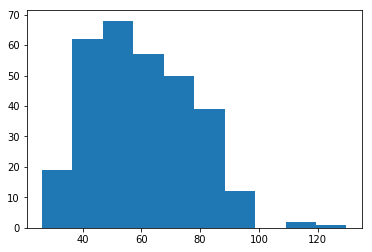

In [46]:
plt.hist(class3data.pelvic_incidence)
plt.show()

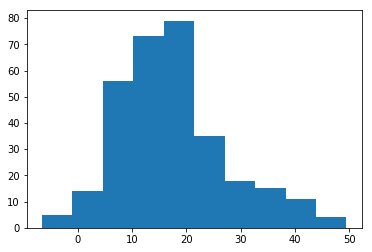

In [47]:
plt.hist(class3data.pelvic_tilt)
plt.show()

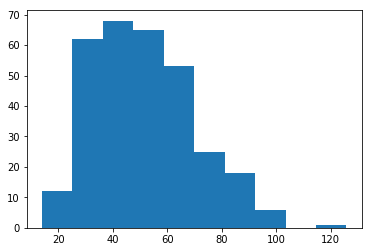

In [48]:
plt.hist(class3data.lumbar_lordosis_angle)
plt.show()

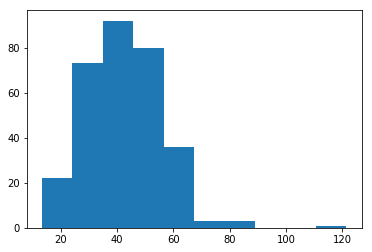

In [49]:
plt.hist(class3data.sacral_slope)
plt.show()

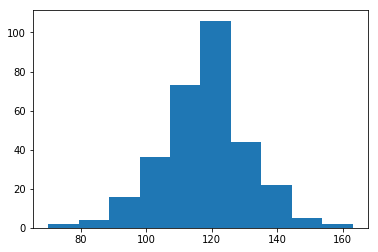

In [50]:
plt.hist(class3data.pelvic_radius)
plt.show()

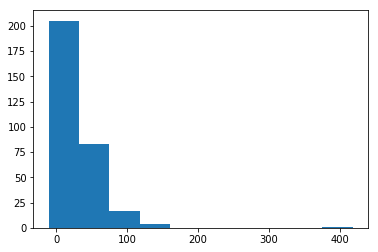

In [51]:
plt.hist(class3data.degree_spondylolisthesis)
plt.show()

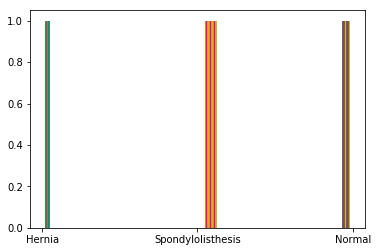

In [52]:
plt.hist(class3data.class_column)
plt.show()

In [57]:
class3data.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class_column                 object
dtype: object

TypeError: can't multiply sequence by non-int of type 'float'

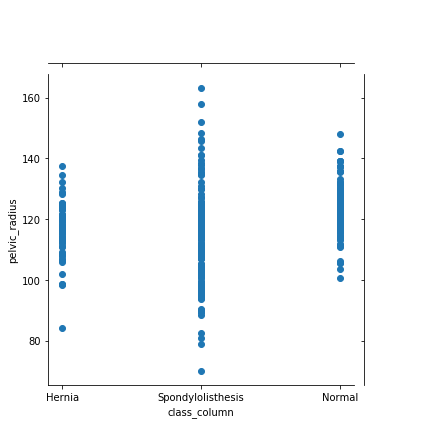

In [58]:
sns.jointplot(x='class_column',y='pelvic_radius',data=class3data)

TypeError: can't multiply sequence by non-int of type 'float'

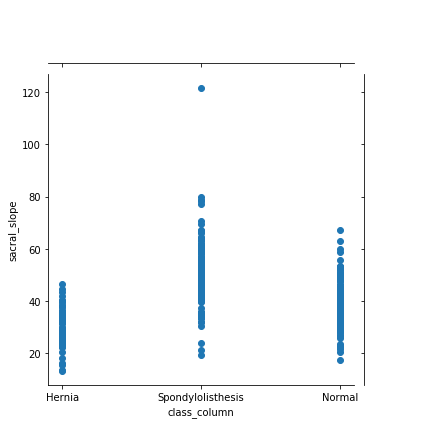

In [59]:
sns.jointplot(x='class_column',y='sacral_slope',data=class3data)

In [60]:
#Encode class variable as integer
label_encoder = preprocessing.LabelEncoder()
print(class3data['class_column'].value_counts())
class3data['class_column']=label_encoder.fit_transform(class3data['class_column'])
print(class3data['class_column'].value_counts())

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class_column, dtype: int64
2    150
1    100
0     60
Name: class_column, dtype: int64


In [61]:
#Creating feature set and target set for the data set
#Features and Labels definition
print(class3data.info())
Y2=class3data.class_column
X2=class3data.drop('class_column',axis=1)
print(Y2.shape)
print(X2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class_column                310 non-null int32
dtypes: float64(6), int32(1)
memory usage: 15.8 KB
None
(310,)
(310, 6)


In [62]:
y2=np.array(Y2)
print(y2.shape)

(310,)


In [63]:
#Normalising the X data between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
x2_scaled = min_max_scaler.fit_transform(X2)
print(x2_scaled)

[[0.35568788 0.51989984 0.22917997 0.2508573  0.30746116 0.02514839]
 [0.12450104 0.2967831  0.09857833 0.14462935 0.47664891 0.03636497]
 [0.41166648 0.51393229 0.32299466 0.30766054 0.38609692 0.0175229 ]
 ...
 [0.34043781 0.52244298 0.28789745 0.23490726 0.59779618 0.01943732]
 [0.18425678 0.27235174 0.24684569 0.21462279 0.52117504 0.02624045]
 [0.07420202 0.20770855 0.20261992 0.14251659 0.57924032 0.02527676]]


In [64]:
#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(x2_scaled,y2,train_size=0.70, test_size=0.30, random_state=1)
print(X2_train.shape)
print(X2_test.shape)

(217, 6)
(93, 6)


In [65]:
#Build KNN model using Train Dataset and predict the class on test dataset
#to start with lets pick k=5
knn=KNeighborsClassifier(n_neighbors=5,p=1,weights='uniform')
knn.fit(X2_train, y2_train)
y2_test_pred=knn.predict(X2_test)

In [66]:
#calculate KNN score
print("knn score for testing : ", knn.score(X2_test,y2_test))

knn score for testing :  0.7311827956989247


In [67]:
#identifying the best k value
error_rate2 = [] 
for k in range(1,30,2): 
    print("For K = ",k,":")
    knn=KNeighborsClassifier(n_neighbors=k,p=1,weights='uniform')
    knn.fit(X2_train, y2_train)
    y2_test_pred=knn.predict(X2_test)
    print("knn score for testing : ", knn.score(X2_test,y2_test))
    error_rate2.append(np.mean(y2_test_pred !=y2_test))

For K =  1 :
knn score for testing :  0.6989247311827957
For K =  3 :
knn score for testing :  0.7096774193548387
For K =  5 :
knn score for testing :  0.7311827956989247
For K =  7 :
knn score for testing :  0.7096774193548387
For K =  9 :
knn score for testing :  0.7311827956989247
For K =  11 :
knn score for testing :  0.7526881720430108
For K =  13 :
knn score for testing :  0.7419354838709677
For K =  15 :
knn score for testing :  0.7311827956989247
For K =  17 :
knn score for testing :  0.7526881720430108
For K =  19 :
knn score for testing :  0.7741935483870968
For K =  21 :
knn score for testing :  0.7741935483870968
For K =  23 :
knn score for testing :  0.7741935483870968
For K =  25 :
knn score for testing :  0.7741935483870968
For K =  27 :
knn score for testing :  0.7741935483870968
For K =  29 :
knn score for testing :  0.7419354838709677


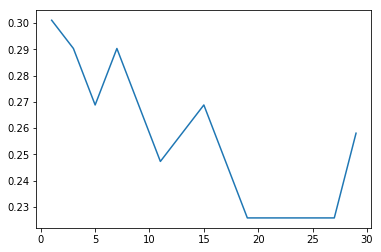

In [227]:
plt.plot(range(1,30,2),error_rate2)
plt.show()

K values from 19 to 27 are optimal